# Project 2

## MC886 A - Machine Learning
### Profª Esther Colombini
#### First Semester 2021

### Group

- Mariana Megumi Izumizawa - RA 221859
- Matheus Carvalho Hatzlhoffer- RA 222174

## Group contribution

We worked in a pair programming format so it was a collaborative project. But if we had to assign each one with a part, we would divide: Matheus worked more in the regression task and Mariana helped more in the classification task.

# PART I - Regression Task

## Regression Task

Sometimes we need to predict the behavior of certain events.

In this case, we will try to predict where the ball, after the kick, will land in relation to the goal and whether our robot can stop the ball. For this task we will use a supervised machine learning method, called Gradient Descent

For this problem we are going to predict the position of the ball on each axis in relation to time so that the axes are linearly independent, because when we think of the mathematical physical model that the ball is inserted it is the most coherent. So we are also not going to test the polynomial fit with polynomials of the third degree or greater, since it also differs from the Newtonian model


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math
from mpl_toolkits import mplot3d
from sklearn.metrics import mean_squared_error

#### polynomial

Given an array of coeficients and a value of X returns the value only polynomial at that value of X
 

In [2]:
def polynomial(coef, X, degree):
    x = np.array(np.ones(X.shape))
    for i in range(1, degree+1):
        x = np.c_[x, X**i]
    return np.inner(coef, x)

#### breakColumns

Return a column of a Matrix as an independent array

In [3]:
def breakColumns(matrix, axis):
    return matrix[:,axis]

#### showData

Shows the ball positions from the collected data and the prediction made by the algorithm in a 3d model


In [4]:
def showData(data, *args, elev=None, azz=None, **kwargs):
    X, Y =  np.meshgrid(np.linspace(-3,3,2), np.linspace(0,2,2))
    Z =  np.zeros(X.shape)
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.scatter3D(data[:,0], data[:,1], data[:, 2], cmap=cm.coolwarm, antialiased=False)
    ax.plot_surface(X, Y, Z, shade=False, color='g', alpha=.4)
    ax.plot([-3, -3, 3, 3], [0, 0.3, 0.3, 0], zdir='y', zs=0, c='b')
    ax.set_xlim(-3, 3)
    ax.set_ylim(0, 2)
    if(args != ()):
        time = np.linspace(1, 55, 80)
        if(kwargs['pltType'] == 'llp'):
            ax.plot(polynomial(args[0], time, 1), polynomial(args[1], time, 1),polynomial(args[2], time, 2), c='orange', linewidth=3)
        elif(kwargs['pltType'] == 'lll'):
            ax.plot(polynomial(args[0], time, 1), polynomial(args[1], time, 1),polynomial(args[2], time, 1), c='orange', linewidth=3)
    ax.view_init(elev, azz)
    plt.show()

#### showAxis

Shows the ball positions from the collected data and the prediction made by the algorithm in a 2d model

In [5]:
def showAxis (X, Y, *args):
    plt.scatter(X, Y)
    if (args != ()):
        plt.plot(X, args[0], c='orange')
    plt.show()

#### closerToZero

Returns the index of the least absolute element of the array X

In [6]:
def closerToZero(X):
    if(len(X)>0):
        close0 = 0
        for i in range(len(X)):
            if(abs(X[i])<abs(X[close0])):
                close0 = i
        return close0
    return -1

### Gradient Descent Algorithm

This algorithm from X values ​​with 1 feature and the degree of the expected polynomial calculates the best value of the coefficients that decreases the mean square error

In the beginning the values ​​of the coefficients are chosen randomly, unless it is a polynomial of the second degree or of the first degree. In these cases, it selects the independent coefficient from the value of X that comes closest to 0 and approximates the other coefficients by the following formulas:





##### First degree

a1 = $\frac{\Delta y}{\Delta x}$

##### Second degree

To find the x and y of the vertex we can use

x = $\frac{-a1}{2a2}$ <br>
y = $\frac{- \Delta}{4a2}$

So we can find good approximations of a1 and a2

In [7]:
def polinomialRegression(X, y, degree, n_epoch=100000, alfa=0.000001):
    x = np.ones(X.shape[0])
    for i in range(1, degree+1):
        x = np.c_[x, X**i]

    #Aproximação do valor inicial
    if(degree == 1):
        close0 = closerToZero(X)
        coef = [y[close0], y[len(y)-1]-y[0]/19]
    elif(degree == 2):
        vertex_y = max(y)
        if(abs(min(y))> abs(vertex_y)):
            vertex_y = min(y)
        vertex_x = X[np.where(y == vertex_y)[0][0]]
        close0 = closerToZero(X)
        c = y[close0]
        a = (vertex_y + c)/vertex_x
        b = -2*a*vertex_x
        coef = [c,a,b]
    else:
        coef = np.random.randn(x.shape[1])

    for j in range(n_epoch):
        old_coef = np.copy(coef)
        y_hat = np.dot(x, coef)
        derivation = (2/x.shape[0])*np.dot(x.T, (y_hat - y))
        coef -= alfa*derivation
        if(True in np.isnan(coef) or True in np.isinf(coef)):
            return(old_coef)

    return coef

##### Importing data

In [8]:
kick1 = np.genfromtxt('kick1.dat')
kick2 = np.genfromtxt('kick2.dat')
time = np.arange(1,21)

### First Data Set



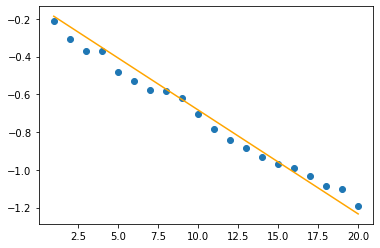

X error:  0.0020639480485149975


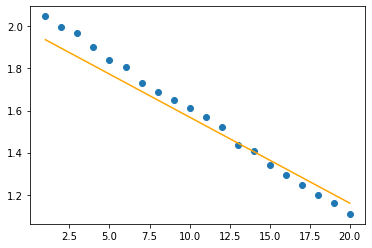

Y error:  0.00361842390040135


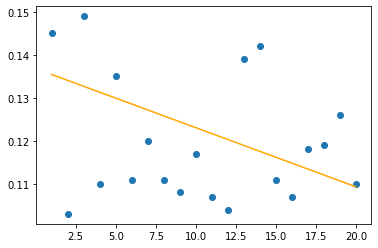

Z error:  0.0002281759671642584


In [9]:
X = breakColumns(kick1, 0)
Y = breakColumns(kick1, 1)
Z = breakColumns(kick1, 2)
coefX = polinomialRegression(time, X, 1)
X_prev = polynomial(coefX, time, 1)
showAxis(time, X, X_prev)
print("X error: ", mean_squared_error(X, X_prev))
coefY = polinomialRegression(time, Y, 1)
Y_prev = polynomial(coefY, time, 1)
showAxis(time, Y, Y_prev)
print("Y error: ", mean_squared_error(Y, Y_prev))
coefZ = polinomialRegression(time, Z, 1)
Z_prev = polynomial(coefZ, time, 1)
showAxis(time, Z, Z_prev)
print("Z error: ", mean_squared_error(Z, Z_prev))



As we can see from the results, when doing a regression with the learning coefficient at 0.000001 and running 100000 times, our results were good enough for our biggest error to be 3 millimeters. As the ball has a diameter of 215 millimeters, we managed to catch the ball with good precision

Now let's see how the learning rate and the degree of the polynomial affect the prediction

In [10]:
coefX = polinomialRegression(time, X, 1)
X_prev = polynomial(coefX, time, 1)
print("X error with alfa 0.000001: ", mean_squared_error(X, X_prev))
coefX = polinomialRegression(time, X, 1, alfa=0.00001)
X_prev = polynomial(coefX, time, 1)
print("X error with alfa 0.00001: ", mean_squared_error(X, X_prev))
coefX = polinomialRegression(time, X, 1, alfa=0.0001)
X_prev = polynomial(coefX, time, 1)
print("X error with alfa 0.0001: ", mean_squared_error(X, X_prev))
coefX = polinomialRegression(time, X, 1, alfa=0.001)
X_prev = polynomial(coefX, time, 1)
print("X error with alfa 0.001: ", mean_squared_error(X, X_prev))

X error with alfa 0.000001:  0.0020639480485149975
X error with alfa 0.00001:  0.0013046878466315974
X error with alfa 0.0001:  0.0007174574377723618
X error with alfa 0.001:  0.0007173110526315786


In [11]:
coefY = polinomialRegression(time, Y, 1)
Y_prev = polynomial(coefY, time, 1)
print("Y error with alfa 0.000001: ", mean_squared_error(Y, Y_prev))
coefY = polinomialRegression(time, Y, 1, alfa=0.00001)
Y_prev = polynomial(coefY, time, 1)
print("Y error with alfa 0.00001: ", mean_squared_error(Y, Y_prev))
coefY = polinomialRegression(time, Y, 1, alfa=0.0001)
Y_prev = polynomial(coefY, time, 1)
print("Y error with alfa 0.0001: ", mean_squared_error(Y, Y_prev))
coefY = polinomialRegression(time, Y, 1, alfa=0.001)
Y_prev = polynomial(coefY, time, 1)
print("Y error with alfa 0.001: ", mean_squared_error(Y, Y_prev))

Y error with alfa 0.000001:  0.00361842390040135
Y error with alfa 0.00001:  0.0016429988270274312
Y error with alfa 0.0001:  0.00011515676362141398
Y error with alfa 0.001:  0.00011477590225563845


In [12]:
coefZ = polinomialRegression(time, Z, 1)
Z_prev = polynomial(coefZ, time, 1)
print("Z error with alfa 0.000001: ", mean_squared_error(Z, Z_prev))
coefZ = polinomialRegression(time, Z, 1, alfa=0.00001)
Z_prev = polynomial(coefZ, time, 1)
print("Z error with alfa 0.00001: ", mean_squared_error(Z, Z_prev))
coefZ = polinomialRegression(time, Z, 1, alfa=0.0001)
Z_prev = polynomial(coefZ, time, 1)
print("Z error with alfa 0.0001: ", mean_squared_error(Z, Z_prev))
coefZ = polinomialRegression(time, Z, 1, alfa=0.001)
Z_prev = polynomial(coefZ, time, 1)
print("Z error with alfa 0.001: ", mean_squared_error(Z, Z_prev))

Z error with alfa 0.000001:  0.0002281759671642584
Z error with alfa 0.00001:  0.00020921754216800037
Z error with alfa 0.0001:  0.0001945546326223017
Z error with alfa 0.001:  0.000194550977443609


In [13]:
coefX = polinomialRegression(time, X, 1)
X_prev = polynomial(coefX, time, 1)
print("first degree X error: ", mean_squared_error(X, X_prev))
coefX = polinomialRegression(time, X, 2)
X_prev = polynomial(coefX, time, 2)
print("second degree X error: ", mean_squared_error(X, X_prev))

first degree X error:  0.0020639480485149975
second degree X error:  0.008585401769593975


In [14]:
coefY = polinomialRegression(time, Y, 1)
Y_prev = polynomial(coefY, time, 1)
print("first degree Y error: ", mean_squared_error(Y, Y_prev))
coefY = polinomialRegression(time, Y, 2)
Y_prev = polynomial(coefY, time, 2)
print("second degree Y error: ", mean_squared_error(Y, Y_prev))

first degree Y error:  0.00361842390040135
second degree Y error:  4.795344577264869


In [15]:
coefZ = polinomialRegression(time, Z, 1)
Z_prev = polynomial(coefZ, time, 1)
print("first degree Z error: ", mean_squared_error(Z, Z_prev))
coefZ = polinomialRegression(time, Z, 2)
Z_prev = polynomial(coefZ, time, 2)
print("second degree Z error: ", mean_squared_error(Z, Z_prev))

first degree Z error:  0.0002281759671642584
second degree Z error:  0.004461018077558821


From the results above we can estimate that the best approximation is the linear one for all axes and the learning coefficient equal to 0.01

Below we can see the trajectory of the ball and its prediction, with an error of less than 0.7 millimeters, more than enough to catch the ball

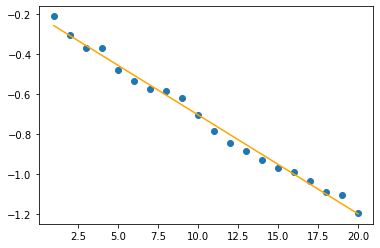

X error:  0.0007173110526315786


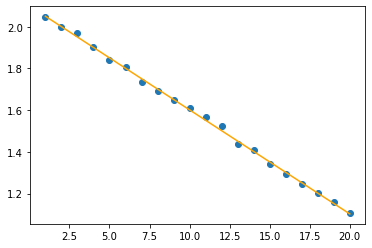

Y error:  0.00011477590225563845


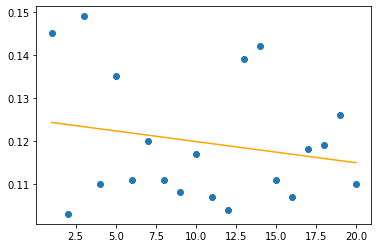

Z error:  0.000194550977443609


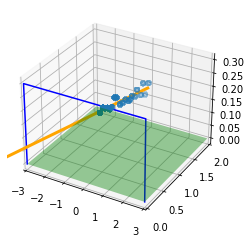

In [16]:
coefX = polinomialRegression(time, X, 1, alfa=0.001)
X_prev = polynomial(coefX, time, 1)
showAxis(time, X, X_prev)
print("X error: ", mean_squared_error(X, X_prev))
coefY = polinomialRegression(time, Y, 1, alfa=0.001)
Y_prev = polynomial(coefY, time, 1)
showAxis(time, Y, Y_prev)
print("Y error: ", mean_squared_error(Y, Y_prev))
coefZ = polinomialRegression(time, Z, 1, alfa=0.001)
Z_prev = polynomial(coefZ, time, 1)
showAxis(time, Z, Z_prev)
print("Z error: ", mean_squared_error(Z, Z_prev))
showData(kick1, coefX, coefY, coefZ, pltType='lll')

### Second Data Set

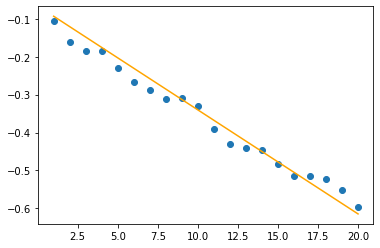

X error:  0.0006168096732866434


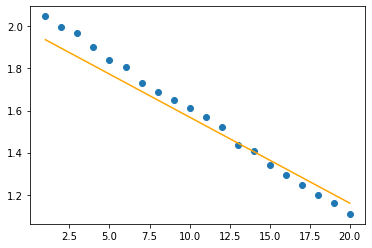

Y error:  0.00361842390040135


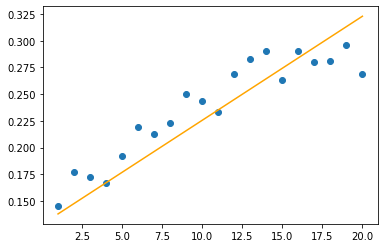

Z error:  0.0005295903590610882


In [17]:
X = breakColumns(kick2, 0)
Y = breakColumns(kick2, 1)
Z = breakColumns(kick2, 2)
coefX = polinomialRegression(time, X, 1)
X_prev = polynomial(coefX, time, 1)
showAxis(time, X, X_prev)
print("X error: ", mean_squared_error(X, X_prev))
coefY = polinomialRegression(time, Y, 1)
Y_prev = polynomial(coefY, time, 1)
showAxis(time, Y, Y_prev)
print("Y error: ", mean_squared_error(Y, Y_prev))
coefZ = polinomialRegression(time, Z, 1)
Z_prev = polynomial(coefZ, time, 1)
showAxis(time, Z, Z_prev)
print("Z error: ", mean_squared_error(Z, Z_prev))

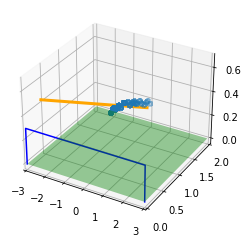

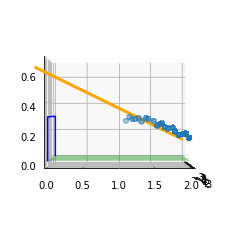

In [18]:
showData(kick2, coefX, coefY, coefZ, pltType='lll')
showData(kick2, coefX, coefY, coefZ, pltType='lll', elev=0, azz=0)

As in the previous data set, our initial approximation already has a margin of error of 3 millimeters, enough to catch the ball, but if the ball follows this trajectory it goes outside and looking at the end of the Z values ​​it looks like the ball is falling.

Let's test other values ​​for the learning rate and the degree of the polynomial

In [19]:
coefX = polinomialRegression(time, X, 1)
X_prev = polynomial(coefX, time, 1)
print("X error with alfa 0.000001: ", mean_squared_error(X, X_prev))
coefX = polinomialRegression(time, X, 1, alfa=0.00001)
X_prev = polynomial(coefX, time, 1)
print("X error with alfa 0.00001: ", mean_squared_error(X, X_prev))
coefX = polinomialRegression(time, X, 1, alfa=0.0001)
X_prev = polynomial(coefX, time, 1)
print("X error with alfa 0.0001: ", mean_squared_error(X, X_prev))
coefX = polinomialRegression(time, X, 1, alfa=0.001)
X_prev = polynomial(coefX, time, 1)
print("X error with alfa 0.001: ", mean_squared_error(X, X_prev))

X error with alfa 0.000001:  0.0006168096732866434
X error with alfa 0.00001:  0.0004081822279137985
X error with alfa 0.0001:  0.00024682465939955523
X error with alfa 0.001:  0.0002467844360902255


In [20]:
coefY = polinomialRegression(time, Y, 1)
Y_prev = polynomial(coefY, time, 1)
print("Y error with alfa 0.000001: ", mean_squared_error(Y, Y_prev))
coefY = polinomialRegression(time, Y, 1, alfa=0.00001)
Y_prev = polynomial(coefY, time, 1)
print("Y error with alfa 0.00001: ", mean_squared_error(Y, Y_prev))
coefY = polinomialRegression(time, Y, 1, alfa=0.0001)
Y_prev = polynomial(coefY, time, 1)
print("Y error with alfa 0.0001: ", mean_squared_error(Y, Y_prev))
coefY = polinomialRegression(time, Y, 1, alfa=0.001)
Y_prev = polynomial(coefY, time, 1)
print("Y error with alfa 0.001: ", mean_squared_error(Y, Y_prev))

Y error with alfa 0.000001:  0.00361842390040135
Y error with alfa 0.00001:  0.0016429988270274312
Y error with alfa 0.0001:  0.00011515676362141398
Y error with alfa 0.001:  0.00011477590225563845


In [21]:
coefZ = polinomialRegression(time, Z, 1)
Z_prev = polynomial(coefZ, time, 1)
print("first degree Z error with alfa 0.000001: ", mean_squared_error(Z, Z_prev))
coefZ = polinomialRegression(time, Z, 1, alfa=0.00001)
Z_prev = polynomial(coefZ, time, 1)
print("first degree Z error with alfa 0.00001: ", mean_squared_error(Z, Z_prev))
coefZ = polinomialRegression(time, Z, 1, alfa=0.0001)
Z_prev = polynomial(coefZ, time, 1)
print("first degree Z error with alfa 0.0001: ", mean_squared_error(Z, Z_prev))
coefZ = polinomialRegression(time, Z, 1, alfa=0.001)
Z_prev = polynomial(coefZ, time, 1)
print("first degree Z error with alfa 0.001: ", mean_squared_error(Z, Z_prev))

first degree Z error with alfa 0.000001:  0.0005295903590610882
first degree Z error with alfa 0.00001:  0.0003956266426773941
first degree Z error with alfa 0.0001:  0.00029201582816461855
first degree Z error with alfa 0.001:  0.0002919899999999998


In [22]:
coefZ = polinomialRegression(time, Z, 2)
Z_prev = polynomial(coefZ, time, 2)
print("second degree Z error with alfa 0.000001: ", mean_squared_error(Z, Z_prev))
coefZ = polinomialRegression(time, Z, 2, alfa=0.00001)
Z_prev = polynomial(coefZ, time, 2)
print("second degree Z error with alfa 0.00001: ", mean_squared_error(Z, Z_prev))

second degree Z error with alfa 0.000001:  0.001070860747000004
second degree Z error with alfa 0.00001:  0.00014516465019730765


In [23]:
coefX = polinomialRegression(time, X, 1)
X_prev = polynomial(coefX, time, 1)
print("first degree X error: ", mean_squared_error(X, X_prev))
coefX = polinomialRegression(time, X, 2)
X_prev = polynomial(coefX, time, 2)
print("second degree X error: ", mean_squared_error(X, X_prev))

first degree X error:  0.0006168096732866434
second degree X error:  0.002211468461203053


In [24]:
coefY = polinomialRegression(time, Y, 1)
Y_prev = polynomial(coefY, time, 1)
print("first degree Y error: ", mean_squared_error(Y, Y_prev))
coefY = polinomialRegression(time, Y, 2)
Y_prev = polynomial(coefY, time, 2)
print("second degree Y error: ", mean_squared_error(Y, Y_prev))

first degree Y error:  0.00361842390040135
second degree Y error:  4.795344577264869


In [25]:
coefZ = polinomialRegression(time, Z, 1)
Z_prev = polynomial(coefZ, time, 1)
print("first degree Z error: ", mean_squared_error(Z, Z_prev))
coefZ = polinomialRegression(time, Z, 2, alfa=0.00001)
Z_prev = polynomial(coefZ, time, 2)
print("second degree Z error: ", mean_squared_error(Z, Z_prev))

first degree Z error:  0.0005295903590610882
second degree Z error:  0.00014516465019730765


As expected, the value of the parabola fits better with the Z axis.

Below we can see the projection with less error

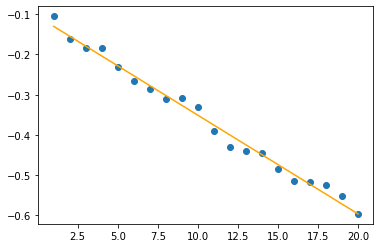

X error:  0.0002467844360902255


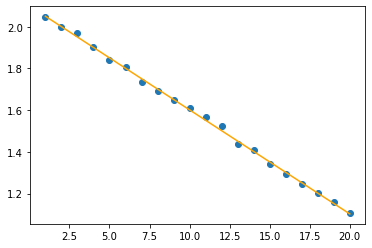

Y error:  0.00011477590225563845


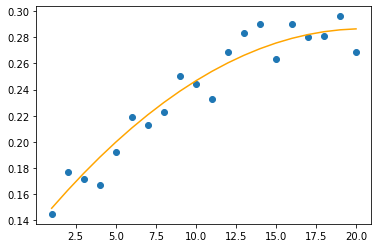

Z error:  0.00014516465019730765


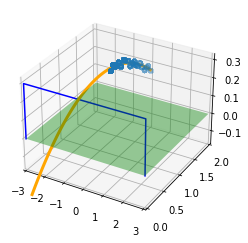

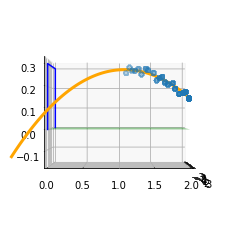

In [26]:
coefX = polinomialRegression(time, X, 1, alfa=0.001)
X_prev = polynomial(coefX, time, 1)
showAxis(time, X, X_prev)
print("X error: ", mean_squared_error(X, X_prev))
coefY = polinomialRegression(time, Y, 1, alfa=0.001)
Y_prev = polynomial(coefY, time, 1)
showAxis(time, Y, Y_prev)
print("Y error: ", mean_squared_error(Y, Y_prev))
coefZ = polinomialRegression(time, Z, 2, alfa=0.00001)
Z_prev = polynomial(coefZ, time, 2)
showAxis(time, Z, Z_prev)
print("Z error: ", mean_squared_error(Z, Z_prev))
showData(kick2, coefX, coefY, coefZ, pltType='llp')
showData(kick2, coefX, coefY, coefZ, pltType='llp', elev=0, azz=0)

When we do a second degree regression for the variable Z, we realize that the ball hits the goal and with a minor error.

# Part II - Classification Task

## Pen-Based Recognition of Handwritten Digits Data Set

It is a simple and well-known image bank for image recognition. It consists of 8-by-8-pixel gray-scale images divided into 10 classes of digits. And we want to solve it as a classification task using supervised learning methods.

### Set Up

In [27]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm, offsetbox
import plotly.graph_objects as go

from sklearn import tree, svm, metrics, manifold, datasets, decomposition, discriminant_analysis
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
from sklearn.preprocessing import normalize

from sklearn.datasets import load_digits

### Plot method

In [28]:
def plot_with_labels(component1, component2, title):
    x_min, x_max = np.min(component1, axis=0), np.max(component1, axis=0)
    component1 = (component1 - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 10))
    ax = plt.subplot(aspect='equal')
    colors = cm.rainbow(np.array(component2).astype(float) / 10)
    sc = ax.scatter(component1[:,0], component1[:,1], lw=0, s=50, c=colors)

    shown_images = np.array([[1., 1.]])
    for i in range(component1.shape[0]):
        if np.min(np.sum((component1[i] - shown_images) ** 2, axis=1)) < 1e-2: continue
        shown_images = np.r_[shown_images, [component1[i]]]
        ax.add_artist(offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), component1[i]))

    plt.xticks([]), plt.yticks([])
    plt.title(title)

### Loading dataset from sklearn

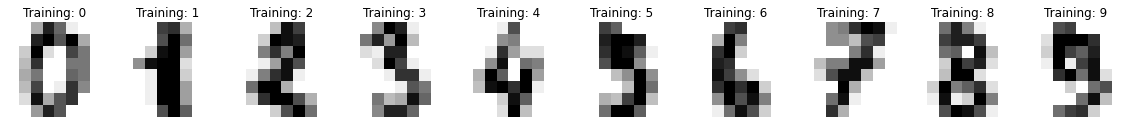

In [29]:
digits = load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

### Normalizing and splitting dataset

In [30]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

data_normalized = normalize(data, norm='max')

training_set, test_set, training_target, test_target = train_test_split(data_normalized, digits.target, test_size=0.1, shuffle=False)

### t-SNE visualization (T-distributed stochastic neighbor embedding)

`t-SNE` is used to visualize high dimensional data. It uses a gaussian kernel to convert high dimentional elements into conection probabilities and a t-Student kernel represents conection probabilities between low dimentional elements, at a mapped space. We can clearly visualize below the classes with respective labels.

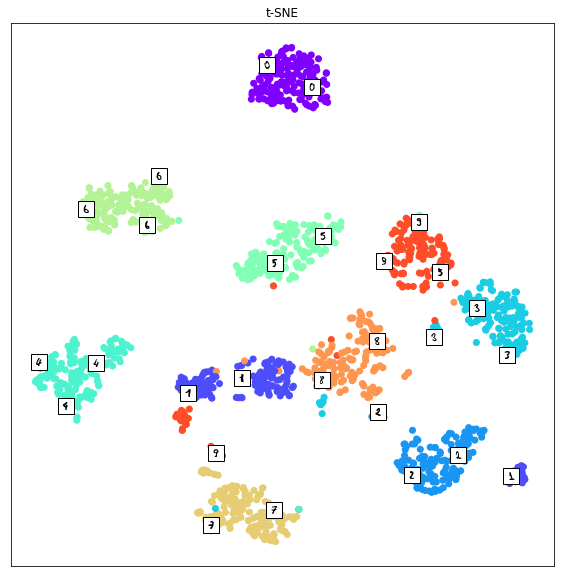

In [31]:
X_tsne = manifold.TSNE(n_components=2, init='pca').fit_transform(training_set)
plot_with_labels(X_tsne, training_target, "t-SNE")

plt.show()

### Decision Tree Classifier

Decision Trees (DTs) are a non-parametic supervised learning method used for classification and regression. In tree models, leaves represent class labels and branches represent conjunctions of features leading to the leaves (class labels). We use `DecisionTreeClassifier` from `sklearn.tree`. After using cross validation, we choose the best validation set and use it to test with the test set.

In [32]:
clf_tree = tree.DecisionTreeClassifier()

cross_validation_tree = cross_validate(clf_tree, training_set, training_target, return_estimator=True)
print(cross_validation_tree['test_score'])
print('We can observe that the split with index %d has the best score of: %0.3f.' % (np.argmax(cross_validation_tree['test_score']), cross_validation_tree['test_score'].max()))

print("From cross validation we obtain %0.3f accuracy with a standard deviation of %0.3f." % (cross_validation_tree['test_score'].mean(), cross_validation_tree['test_score'].std()))

[0.77777778 0.7962963  0.77708978 0.88544892 0.76780186]
We can observe that the split with index 3 has the best score of: 0.885.
From cross validation we obtain 0.801 accuracy with a standard deviation of 0.043.


In [33]:
cross_validation_tree['estimator'][np.argmax(cross_validation_tree['test_score'])].fit(training_set, training_target)

predicted_tree = cross_val_predict(cross_validation_tree['estimator'][np.argmax(cross_validation_tree['test_score'])], test_set, test_target)

print("Without cross validation we obtain a score of %0.3f." % (cross_validation_tree['estimator'][np.argmax(cross_validation_tree['test_score'])].score(test_set, test_target)))

Without cross validation we obtain a score of 0.806.


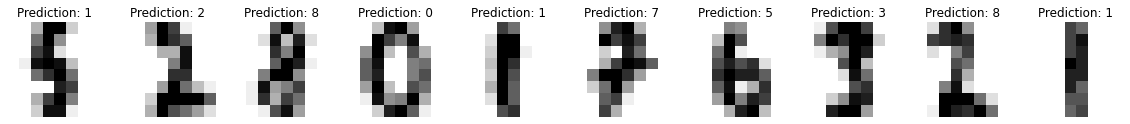

In [34]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for ax, image, prediction in zip(axes, test_set, predicted_tree):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

We can see that the most of the 10 shown predictions are wrong. We plot the confusion matrix below to analyze better.

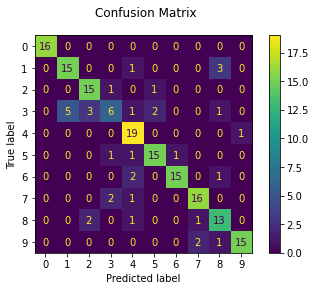

In [35]:
disp = metrics.plot_confusion_matrix(cross_validation_tree['estimator'][np.argmax(cross_validation_tree['test_score'])], test_set, test_target)
disp.figure_.suptitle("Confusion Matrix")

plt.show() 

From the confusion matrix, we can observe the number of false positive and false negative predicted labels.

### C-Support Vector Classification

Support-vector machines (SVMs) are popular supervised learning models with algorithms able to classify, analyze regression and other learning tasks. SVM usually tries to create a line or frontier that maximizes the margin between data classes. This line is called hyperplane, the distance between the hyperplane and the closest elements is the margin and the vectors that define the hyperplane are called support vectors, which give its name. 

In this project we use C-Support Vector Classification (`svm.SVC`) from sklearn lib that is based on libsvm. `C` stands for its regularization parameter, the strength of the regularization is inversely proportional to `C`. And we specify the `kernel` type to be used in the algorithm, `poly`.<br> After using cross validation, we choose the best validation set and use it to test with the test set.

In [36]:
clf_svc = svm.SVC(kernel='poly')

cross_validation_svc = cross_validate(clf_svc, training_set, training_target, return_estimator=True)
print(cross_validation_svc['test_score'])
print('We can observe that the split with index %d has the best score of: %0.3f.' % (np.argmax(cross_validation_svc['test_score']), cross_validation_svc['test_score'].max()))

print("From cross validation we obtain %0.3f accuracy with a standard deviation of %0.3f." % (cross_validation_svc['test_score'].mean(), cross_validation_svc['test_score'].std()))

[0.97839506 0.91666667 0.97832817 0.98142415 0.9504644 ]
We can observe that the split with index 3 has the best score of: 0.981.
From cross validation we obtain 0.961 accuracy with a standard deviation of 0.025.


In [37]:
cross_validation_svc['estimator'][np.argmax(cross_validation_svc['test_score'])].fit(training_set, training_target)

predicted_svc = cross_val_predict(cross_validation_svc['estimator'][np.argmax(cross_validation_svc['test_score'])], test_set, test_target)

print("Without cross validation we obtain a score of %0.3f." % (cross_validation_svc['estimator'][np.argmax(cross_validation_svc['test_score'])].score(test_set, test_target)))

Without cross validation we obtain a score of 0.967.


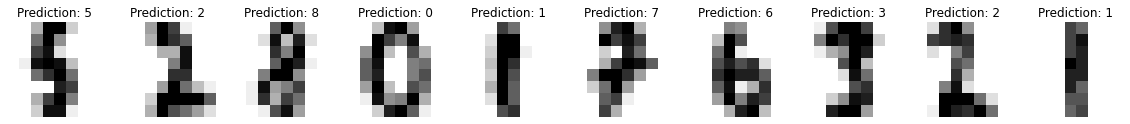

In [38]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for ax, image, prediction in zip(axes, test_set, predicted_svc):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

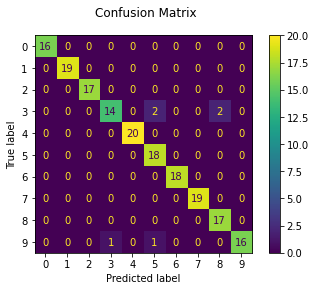

In [39]:
disp = metrics.plot_confusion_matrix(cross_validation_svc['estimator'][np.argmax(cross_validation_svc['test_score'])], test_set, test_target)
disp.figure_.suptitle("Confusion Matrix")

plt.show() 

Different from the `decision tree` plot, the predicted labels above from `SVC` are all correct and the number of false positives and false negatives in confusion matrix is a lot lower than the previous matrix. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f96ded6d-d068-4049-b80f-7d8e29514f85' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>